In [4]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense # Полносвязная нейронная сеть
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
import numpy as np
import pylab # Модуль для построения графиков
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from PIL import Image
# отрисовать график не в консоль а в ноутбук
%matplotlib inline

In [5]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [6]:
x_train_org[0].shape

(28, 28)

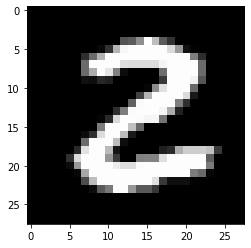

In [7]:
n = 25
plt.imshow(Image.fromarray(x_train_org[n]).convert('RGB'))
plt.show()

In [8]:
x_train = x_train_org.reshape(60000, 784)
x_test = x_test_org.reshape(10000, 784)
print(x_train_org.shape)
print(x_train.shape)

(60000, 28, 28)
(60000, 784)


In [9]:
x_train = x_train.astype('float32')
x_train = x_train / 255
x_test = x_test.astype('float32')
x_test = x_test / 255

In [10]:
# Преобразуем ответы в формат one_hot_encoding
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

# Создаем нейронную сеть

In [11]:
model = Sequential()
model.add(Dense(800, input_dim = 784, activation="relu"))
model.add(Dense(400, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [14]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Обучение

In [15]:
model.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1)

Epoch 1/15
469/469 [==============================] - 6s 11ms/step - loss: 0.3775 - accuracy: 0.8890
Epoch 2/15
469/469 [==============================] - 5s 11ms/step - loss: 0.0796 - accuracy: 0.9747
Epoch 3/15
469/469 [==============================] - 5s 11ms/step - loss: 0.0453 - accuracy: 0.9863
Epoch 4/15
469/469 [==============================] - 6s 12ms/step - loss: 0.0334 - accuracy: 0.9893
Epoch 5/15
469/469 [==============================] - 6s 12ms/step - loss: 0.0232 - accuracy: 0.9924
Epoch 6/15
469/469 [==============================] - 5s 11ms/step - loss: 0.0175 - accuracy: 0.9943
Epoch 7/15
469/469 [==============================] - 4s 10ms/step - loss: 0.0155 - accuracy: 0.9950
Epoch 8/15
469/469 [==============================] - 5s 10ms/step - loss: 0.0145 - accuracy: 0.9952
Epoch 9/15
469/469 [==============================] - 5s 11ms/step - loss: 0.0107 - accuracy: 0.9969
Epoch 10/15
469/469 [==============================] - 6s 13ms/step - loss: 0.0100 - accura

In [16]:
model.save_weights('model.h5')
model.load_weights('model.h5')

# Распознание реальных цифр

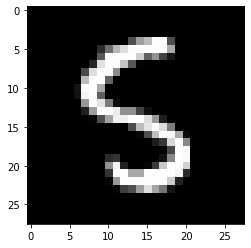

In [17]:
n_rec = 1235 #Номер тестовой цифры, которую будем распознавать
plt.imshow(Image.fromarray(x_test_org[n_rec]).convert('RGBA')) # Нарисуем картинку из тестового набора под номером n_rec
plt.show()

In [18]:
x = x_test[n_rec]
x = np.expand_dims(x, axis=0)
prediction = model.predict(x)

In [19]:
print(prediction)

[[2.87632154e-20 5.64727789e-13 4.46540450e-17 3.26675770e-11
  3.96219084e-22 1.00000000e+00 2.14666762e-14 1.20617384e-17
  9.73924136e-11 1.07229746e-11]]


In [20]:
prediction = np.argmax(prediction)
print(prediction)

5


In [21]:
print(y_test_org[n_rec])

5
